In [1]:
from __future__ import print_function, division
#Allows relative imports
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
#imports from files
from src.preprocessing import *
from src.train_eval_helpers import *
from src.VAE_train import *

from src.vautoencoders import *
#from loss_metrics import *
from src.plots import *
from src.pickling import *
from src.datasets import *

import pandas as pd 
import numpy as np
import math

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

#checking gpu status
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using : {}".format(device))
else:
    device = torch.device('cpu')
    print("Using : {}".format(device))
    
#Plot and stuff
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi']= 300
sns.set_style('darkgrid')


# Ignore warnings)
import warnings
warnings.filterwarnings("ignore")
    
%load_ext autoreload
%autoreload 2

Using : cuda


In [2]:
train_dataset, valid_dataset, test_dataset  = load_naive_dataset('../training_data_new/db_TRB.csv')

## Now, try to reproduce and retrain the best model I got (no manual tuning)
- with the full dataset and smaller LR
- latent dim = 40
- act = nn.SELU()
- weight decay ~= LR
- weighted labeling (= 1.6)

In [48]:
ls = list('CASSLYNGEQFFXXXX')
ls[-4] = 'X1'
ls[-3] = 'X2'
ls[-2] = 'X3'
ls[-1] = 'X4'

In [66]:
df = pd.DataFrame(columns = ls, index = ['X', 'A', 'C', '...', 'Y', 'N-term','centre','C-term','pad'])
#df = df.rename(columns= {}
df.loc['...'] = '...'
df.loc['X'] = [0]*12 + 4*[0]
df.loc['A'] = [0]*1 + 1*[1] + 14*[0]
df.loc['C'] = [1]*1 + 15*[0]
df.loc['Y'] = [0]*5 + 1 * [1] + 10*[0]
df.loc['N-term'] = 4*[1] + 12*[0]
df.loc['centre'] = 4*[0]+ 4*[1] + 8*[0]
df.loc['C-term'] = 8*[0] + 4*[1] + 4*[0]
df.loc['pad'] = 12*[0] + 4*[1]

In [6]:
nb_epochs = 25
latent_dim = 40
batchsize = 2**15
lr = 1e-3
adaptive = (3, 0.95)


model_redo = AutoEncoder(latent_dim = latent_dim, aa_dim = 21, 
                             seq_len = 23, act = nn.SELU())

model_redo.to(device)
optimizer = torch.optim.AdamW(model_redo.parameters(), lr = lr, weight_decay=1e-3)
criterion = nn.MSELoss()

name = '_'.join(['NormalAE','redo-weighted','WD','latdim'+str(latent_dim),
                 f'adaptive{adaptive[0]}-{adaptive[1]}','lr'+str(lr)])


For model : NormalAE_redo-weighted_WD_latdim40_adaptive3-0.95_lr0.001


  0%|          | 0/20 [00:00<?, ?it/s]

Train Batch, epoch 0::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 0 epochs: 	TRAIN:0.02367617618482636	VAL:0.012538785114884377


Train Batch, epoch 1::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 1 epochs: 	TRAIN:0.01016431072802872	VAL:0.008213163779250214


Train Batch, epoch 2::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 2 epochs: 	TRAIN:0.007585280408550586	VAL:0.006675202678889036


Train Batch, epoch 3::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 3 epochs: 	TRAIN:0.006466871849736389	VAL:0.005955197090016944


Train Batch, epoch 4::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 4 epochs: 	TRAIN:0.005867884052461203	VAL:0.0054594238421746665


Train Batch, epoch 5::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 5 epochs: 	TRAIN:0.005423836329267646	VAL:0.005089918484113046


Train Batch, epoch 6::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 6 epochs: 	TRAIN:0.005092397598283631	VAL:0.0047937679503645214


Train Batch, epoch 7::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 7 epochs: 	TRAIN:0.004827395627959346	VAL:0.004603898139404399


Train Batch, epoch 8::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 8 epochs: 	TRAIN:0.0046172111095594505	VAL:0.004414280131459236


Train Batch, epoch 9::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 9 epochs: 	TRAIN:0.0044951140025288475	VAL:0.004319178273103067


Train Batch, epoch 10::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 10 epochs: 	TRAIN:0.004400624941122167	VAL:0.004208930541894265


Train Batch, epoch 11::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 11 epochs: 	TRAIN:0.004293879080677823	VAL:0.004147620286260333


Train Batch, epoch 12::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 12 epochs: 	TRAIN:0.004238066567602206	VAL:0.004074750814054694


Train Batch, epoch 13::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 13 epochs: 	TRAIN:0.004167625851625082	VAL:0.004047632363757917


Train Batch, epoch 14::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 14 epochs: 	TRAIN:0.0041206808219074595	VAL:0.003986332565546036


Train Batch, epoch 15::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 15 epochs: 	TRAIN:0.004081203317155643	VAL:0.00396255495558892


Train Batch, epoch 16::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 16 epochs: 	TRAIN:0.004046769394558303	VAL:0.003923117056755083


Train Batch, epoch 17::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 17 epochs: 	TRAIN:0.004020813857300245	VAL:0.003901110522981201


Train Batch, epoch 18::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 18 epochs: 	TRAIN:0.003992625588209045	VAL:0.0038714721466281583


Train Batch, epoch 19::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

	Losses at 19 epochs: 	TRAIN:0.003968353178922315	VAL:0.0038534583257777352


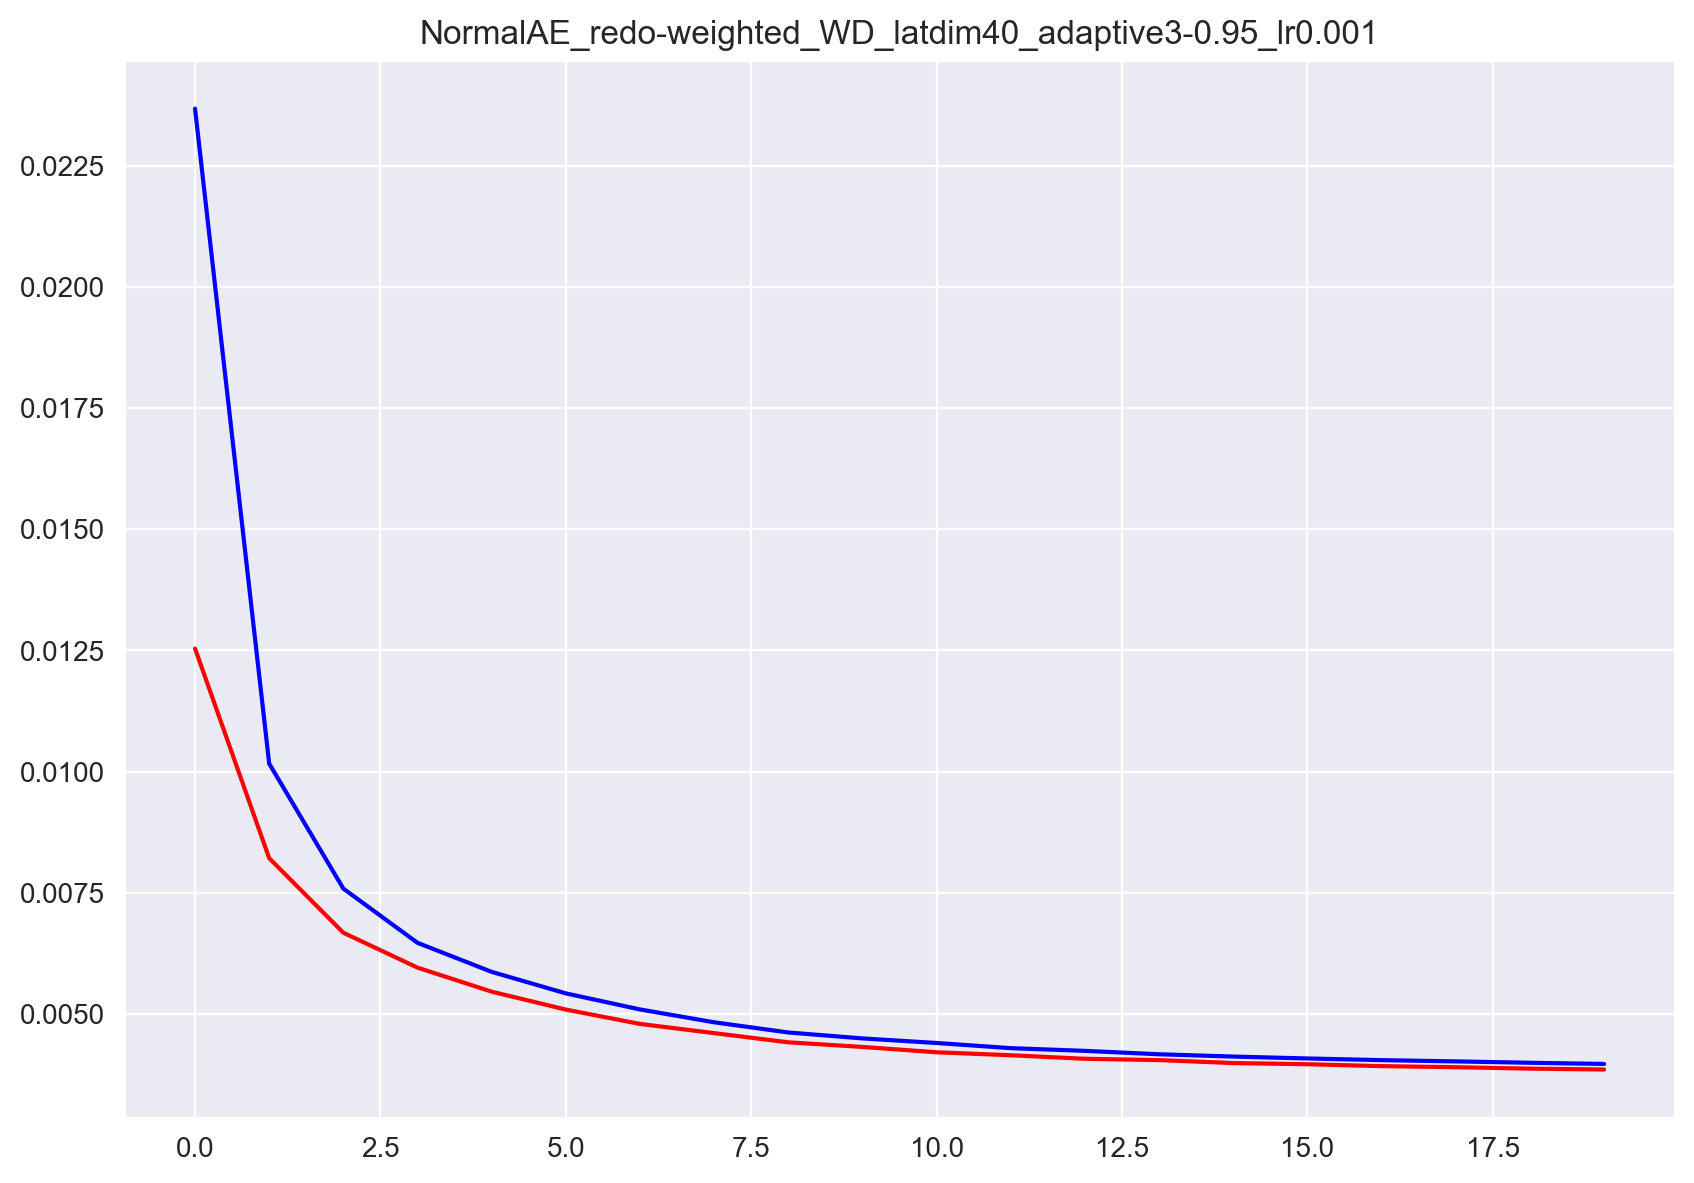

In [3]:
from src.vautoencoders import AutoEncoder
nb_epochs = 25
latent_dim = 40
batchsize = 2**15
lr = 1e-3
adaptive = (3, 0.95)


model_redo = AutoEncoder(latent_dim = latent_dim, aa_dim = 21, 
                             seq_len = 23, act = nn.SELU())

model_redo.to(device)
optimizer = torch.optim.AdamW(model_redo.parameters(), lr = lr, weight_decay=1e-3)
criterion = nn.MSELoss()

name = '_'.join(['NormalAE','redo-weighted','WD','latdim'+str(latent_dim),
                 f'adaptive{adaptive[0]}-{adaptive[1]}','lr'+str(lr)])

train_losses, val_losses = train_eval(model_redo, criterion, optimizer, 
                                      train_dataset, valid_dataset,
                                      batchsize, max_len= 23, weighted=1.6, device=device, 
                                      lr= lr, nb_epochs = 20, outdir=os.getcwd(),
                                      filename = name, adaptive=adaptive)

### Re-evaluating the model

In [5]:
# Reloading the best weight
best_chkpt = torch.load('./'+name+'.pth.tar')
model_redo.load_state_dict(best_chkpt['state_dict'])

<All keys matched successfully>

In [ ]:
model_redo = AutoEncoder(latent_dim = latent_dim, aa_dim = 21, 
                             seq_len = 23, act = nn.SELU())

In [ ]:
# Loading emerson data
emerson = pd.read_csv('../training_data_new/emerson_raw/batch1/emerson_batch1_626hla_parsed_tagged.tsv', sep='\t')
#emerson_dataset = np.array([x for x in emerson.query('amino_acid.str.len() <= 23').amino_acid.values if x not in train_dataset])

In [31]:
emerson_sub = emerson.sample(100000).query('amino_acid.str.len() <= 23').amino_acid.values

In [26]:
from src.VAE_train import test_decode
print('\n#######################\nEMERSON')
test_decode(model_redo, emerson_sub, 10)
print('\n#######################\n\nTest set')
test_decode(model_redo, test_dataset, 10)


#######################
EMERSON

real:		CASSSQGGGDNEQFFXXXXXXXX
decoded:	CASSSXGGGDNEQFFXXXXXXXX

real:		CASSYLNQPQHFXXXXXXXXXXX
decoded:	CASSTLNQPQHFXXXXXXXXXXX

real:		CASSYVREVENEQFFXXXXXXXX
decoded:	CASSTVREVXNEQFFXXXXXXXX

real:		CASSSDRVTGELFFXXXXXXXXX
decoded:	CASSSDRXTGELFFXXXXXXXXX

real:		CASSEERRGPEAFFXXXXXXXXX
decoded:	CASSEERRGXEAFFXXXXXXXXX

real:		CASSLSGGPTNEKLFFXXXXXXX
decoded:	CASSLSGGPTNEXLFFXXXXXXX

real:		CASFGISGANVLTFXXXXXXXXX
decoded:	CASSGXSGANVLTFXXXXXXXXX

real:		CASSQSIEPSNQPQHFXXXXXXX
decoded:	CASSQSXEPSNQPQHFXXXXXXX

real:		CASSPRGGTNYGYTFXXXXXXXX
decoded:	CASSPRGGTNYGYTFXXXXXXXX

real:		CASSWGQGTQETQYFXXXXXXXX
decoded:	CASSXGQGTQETQYFXXXXXXXX

#######################

Test set

real:		CASSAMGAAISNTEAFFXXXXXX
decoded:	CASSAXGAAXSNTEXFFXXXXXX

real:		CASNPQRGAGGGDTQYFXXXXXX
decoded:	CASNPXRGAGGGXTQYFXXXXXX

real:		CASSSRQAYQYERFFXXXXXXXX
decoded:	CASSSRQAYQYERFFXXXXXXXX

real:		CASSLEGQGPTDTQYFXXXXXXX
decoded:	CASSLEGQGXTDTQYFXXXXXXX

real:		CASSLASFGGVDFX

#### Train the same model for 20 more epochs since it seemed to go well


For model : NormalAE_BestModel_20more_epochs_latdim40_adaptive2-0.95_lr0.000667


  0%|          | 0/25 [00:00<?, ?it/s]

Train Batch, epoch 0::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 0 epochs: 	TRAIN: 4.9414e-03	VAL: 3.9960e-03


Train Batch, epoch 1::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 1 epochs: 	TRAIN: 4.0200e-03	VAL: 3.8617e-03


Train Batch, epoch 2::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 2 epochs: 	TRAIN: 3.9653e-03	VAL: 3.8453e-03


Train Batch, epoch 3::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 3 epochs: 	TRAIN: 3.9502e-03	VAL: 3.8311e-03


Train Batch, epoch 4::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 4 epochs: 	TRAIN: 3.9373e-03	VAL: 3.8198e-03


Train Batch, epoch 5::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 5 epochs: 	TRAIN: 3.9250e-03	VAL: 3.8103e-03


Train Batch, epoch 6::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 6 epochs: 	TRAIN: 3.9130e-03	VAL: 3.7990e-03


Train Batch, epoch 7::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 7 epochs: 	TRAIN: 3.9096e-03	VAL: 3.8228e-03


Train Batch, epoch 8::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 8 epochs: 	TRAIN: 3.8978e-03	VAL: 3.7741e-03


Train Batch, epoch 9::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 9 epochs: 	TRAIN: 3.8814e-03	VAL: 3.8019e-03


Train Batch, epoch 10::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 10 epochs: 	TRAIN: 3.8820e-03	VAL: 3.7511e-03


Train Batch, epoch 11::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 11 epochs: 	TRAIN: 3.8662e-03	VAL: 4.1456e-03


Train Batch, epoch 12::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 12 epochs: 	TRAIN: 3.8977e-03	VAL: 3.7164e-03


Train Batch, epoch 13::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 13 epochs: 	TRAIN: 3.8031e-03	VAL: 3.6867e-03


Train Batch, epoch 14::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 14 epochs: 	TRAIN: 3.7885e-03	VAL: 3.6796e-03


Train Batch, epoch 15::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 15 epochs: 	TRAIN: 3.7792e-03	VAL: 3.6706e-03


Train Batch, epoch 16::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 16 epochs: 	TRAIN: 3.7691e-03	VAL: 3.6595e-03


Train Batch, epoch 17::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 17 epochs: 	TRAIN: 3.7585e-03	VAL: 3.6744e-03


Train Batch, epoch 18::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 18 epochs: 	TRAIN: 3.7492e-03	VAL: 3.6405e-03


Train Batch, epoch 19::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 19 epochs: 	TRAIN: 3.7437e-03	VAL: 3.6883e-03


Train Batch, epoch 20::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 20 epochs: 	TRAIN: 3.7363e-03	VAL: 3.6265e-03


Train Batch, epoch 21::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 21 epochs: 	TRAIN: 3.7257e-03	VAL: 3.6284e-03


Train Batch, epoch 22::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 22 epochs: 	TRAIN: 3.7200e-03	VAL: 3.6203e-03


Train Batch, epoch 23::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 23 epochs: 	TRAIN: 3.7139e-03	VAL: 3.6096e-03


Train Batch, epoch 24::   0%|          | 0/98 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/35 [00:00<?, ?it/s]

Losses at 24 epochs: 	TRAIN: 3.7051e-03	VAL: 3.5998e-03


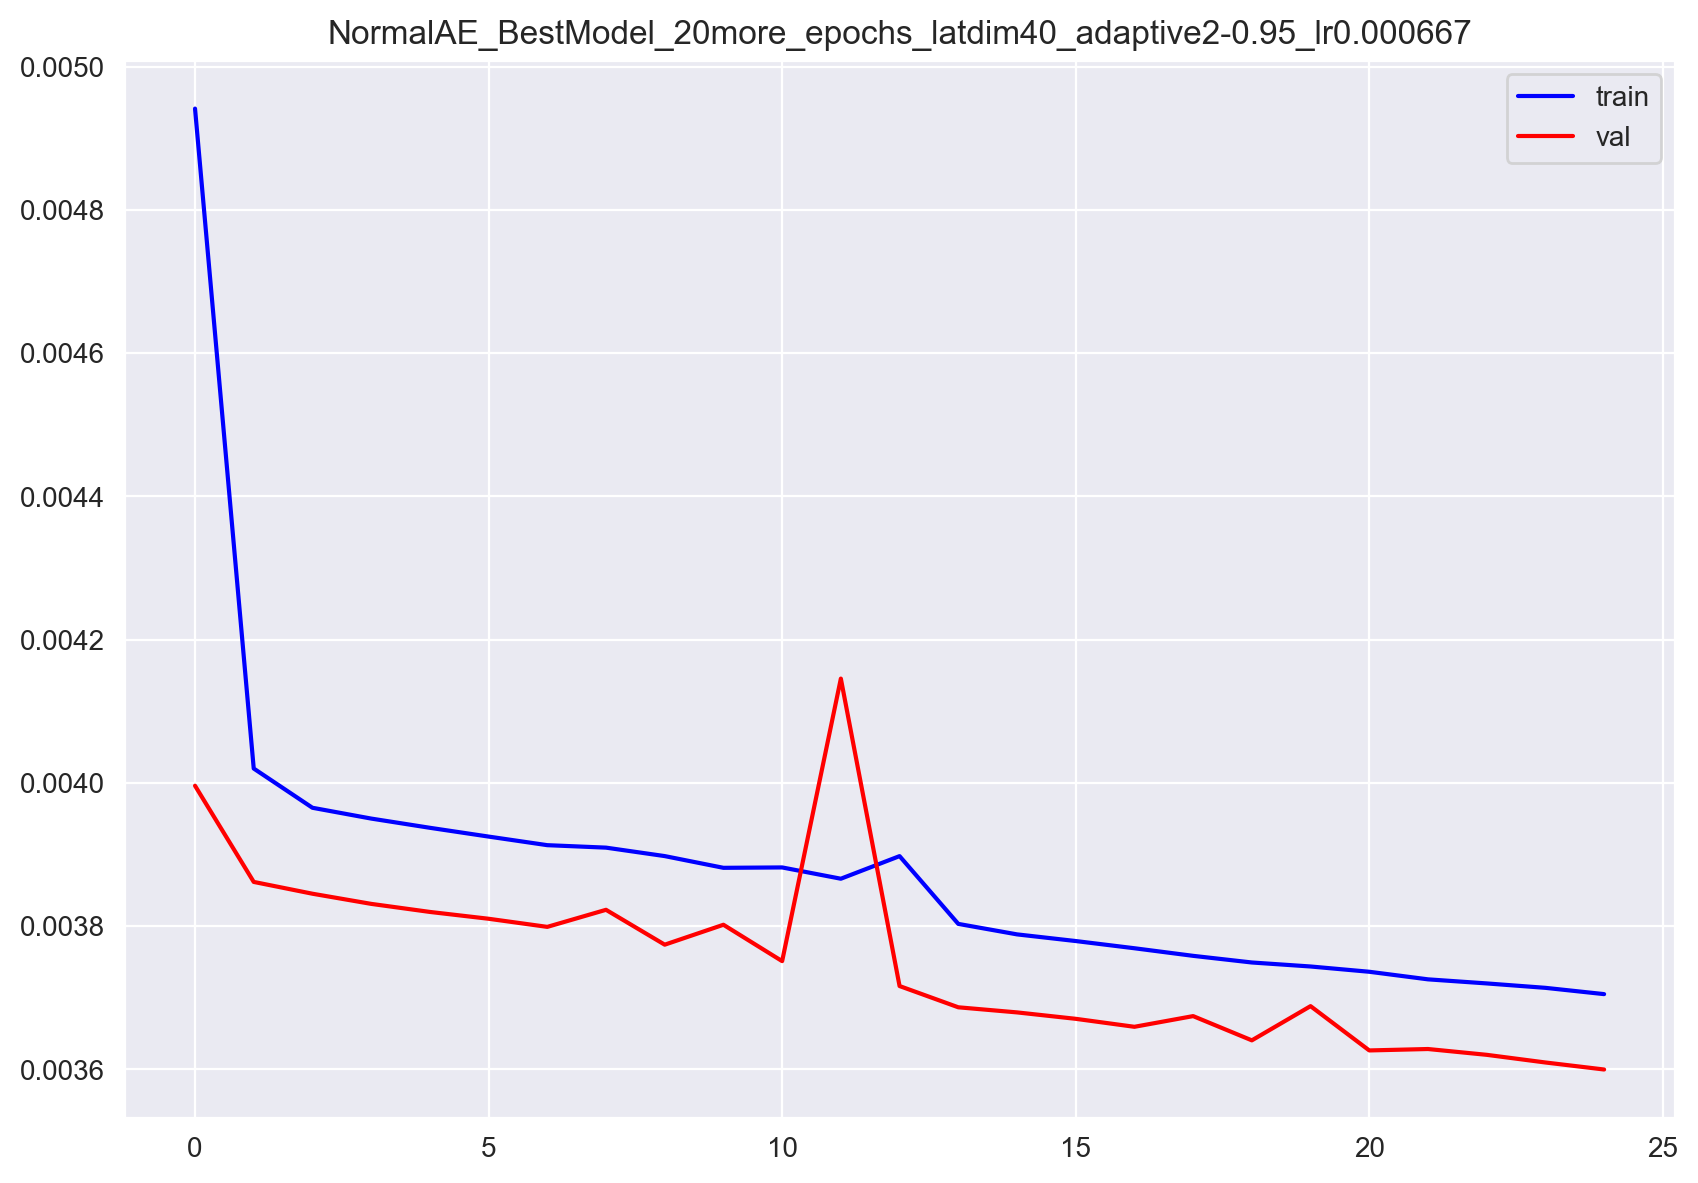

In [4]:
from src.vautoencoders import AutoEncoder
nb_epochs = 25
latent_dim = 40
batchsize = 2**15
lr = 6.67e-4
adaptive = (2, 0.95)
model_redo = AutoEncoder(latent_dim = latent_dim, aa_dim = 21, 
                             seq_len = 23, act = nn.SELU())
model_redo.to(device)
# Reloading the best weight
best_chkpt = torch.load('./'+'NormalAE_redo-weighted_WD_latdim40_adaptive3-0.95_lr0.001'+'.pth.tar')
model_redo.load_state_dict(best_chkpt['state_dict'])

optimizer = torch.optim.AdamW(model_redo.parameters(), lr = lr, weight_decay=1e-3)
criterion = nn.MSELoss()

name = '_'.join(['NormalAE_BestModel_20more_epochs','latdim'+str(latent_dim),
                 f'adaptive{adaptive[0]}-{adaptive[1]}','lr'+str(lr)])

train_losses, val_losses = train_eval(model_redo, criterion, optimizer, 
                                      train_dataset, valid_dataset,
                                      batchsize, max_len= 23, weighted=1.6, device=device, 
                                      lr= lr, nb_epochs = nb_epochs, outdir=os.getcwd(),
                                      filename = name, adaptive=adaptive)

## MORE
with Emerson dataset

In [2]:
emerson = pd.read_csv('../training_data_new/emerson_raw/batch1/emerson_batch1_626hla_parsed_tagged.tsv', sep='\t')
sample_tags = pd.read_csv('../training_data_new/emerson_raw/batch1/emerson_batch1_sampletags.tsv', sep ='\t')

In [3]:
train_dataset, valid_dataset, test_dataset  = load_naive_dataset('../training_data_new/db_TRB.csv')

In [4]:
a = emerson.sample(frac=0.8).query('len > 10 and len <= 23')
b = emerson.loc[emerson.index.difference(a.index)].query('len > 10 and len <= 23')
train_dataset = np.append(train_dataset,a.amino_acid.values)
valid_dataset = np.append(valid_dataset,b.amino_acid.values)

In [5]:
from src.vautoencoders import AutoEncoder
### Normal AE without positional Encoding (best model) ###
model_reload =  AutoEncoder(latent_dim = 40, aa_dim = 21, 
                             seq_len = 23, act = nn.SELU())
chkpt = torch.load('./Best_AE_model_latdim40_withSELU.pth.tar')
model_reload.load_state_dict(chkpt['state_dict'])
##########################################################

<All keys matched successfully>

In [67]:
name

'ContinueTrainingBestModelWithEmerson_latdim40_WD1e-3adaptive3-0.95_lr0.0005'


For model : ContinueTrainingBestModelWithEmersonSECONDTIME_latdim40_WD1e-3adaptive3-0.95_lr0.0005


  0%|          | 0/10 [00:00<?, ?it/s]

Train Batch, epoch 0::   0%|          | 0/695 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/184 [00:00<?, ?it/s]

Losses at 0 epochs: 	TRAIN: 3.4065e-03	VAL: 2.8365e-03

real:		CASSYGGSQETQYFXXXXXXXXX
decoded:	CASSXGGSQETQYFXXXXXXXXX


test set:   0%|          | 0/56 [00:00<?, ?it/s]

,Accuracy,Precision,Recall,F1_score,Hamming_loss,Criterion_loss
mean,0.978451,0.589269,0.935942,0.721093,0.042006,0.002835
var,0.0,0.0,0.0,0.0,0.0,0.0


Train Batch, epoch 1::   0%|          | 0/695 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/184 [00:00<?, ?it/s]

Losses at 1 epochs: 	TRAIN: 2.8137e-03	VAL: 2.7518e-03

real:		CASSFQGARGETQYFXXXXXXXX
decoded:	CASSXXGARGETQYFXXXXXXXX


test set:   0%|          | 0/56 [00:00<?, ?it/s]

,Accuracy,Precision,Recall,F1_score,Hamming_loss,Criterion_loss
mean,0.978626,0.591096,0.938858,0.723331,0.040182,0.002751
var,0.0,0.0,0.0,0.0,0.0,0.0


Train Batch, epoch 2::   0%|          | 0/695 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/184 [00:00<?, ?it/s]

Losses at 2 epochs: 	TRAIN: 2.7129e-03	VAL: 2.7379e-03

real:		CASNANPMATQFFXXXXXXXXXX
decoded:	CASNAXPXATQFFXXXXXXXXXX


test set:   0%|          | 0/56 [00:00<?, ?it/s]

,Accuracy,Precision,Recall,F1_score,Hamming_loss,Criterion_loss
mean,0.978628,0.591152,0.938855,0.723376,0.040152,0.002738
var,0.0,0.0,0.0,0.0,0.0,0.0


Train Batch, epoch 3::   0%|          | 0/695 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/184 [00:00<?, ?it/s]

Losses at 3 epochs: 	TRAIN: 3.6351e-03	VAL: 3.8809e-03

real:		CSVGLTVNTEAFFXXXXXXXXXX
decoded:	CSVGLTVNXEAFFXXXXXXXXXX


test set:   0%|          | 0/56 [00:00<?, ?it/s]

,Accuracy,Precision,Recall,F1_score,Hamming_loss,Criterion_loss
mean,0.976537,0.569242,0.904204,0.696612,0.062162,0.003877
var,0.0,0.0,0.000001,0.000001,0.0,0.0


Train Batch, epoch 4::   0%|          | 0/695 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/184 [00:00<?, ?it/s]

Losses at 4 epochs: 	TRAIN: 3.9631e-03	VAL: 4.1549e-03

real:		CASRTSGGFTDTQYFXXXXXXXX
decoded:	CASRTSGGXTDTQYFXXXXXXXX


test set:   0%|          | 0/56 [00:00<?, ?it/s]

,Accuracy,Precision,Recall,F1_score,Hamming_loss,Criterion_loss
mean,0.975973,0.563258,0.894892,0.689349,0.068017,0.004158
var,0.0,0.0,0.0,0.0,0.0,0.0


Train Batch, epoch 5::   0%|          | 0/695 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/184 [00:00<?, ?it/s]

Losses at 5 epochs: 	TRAIN: 4.3302e-03	VAL: 5.5969e-03

real:		CASSPEAGYEQYFXXXXXXXXXX
decoded:	CASSPEAXYEQYFXXXXXXXXXX


test set:   0%|          | 0/56 [00:00<?, ?it/s]

,Accuracy,Precision,Recall,F1_score,Hamming_loss,Criterion_loss
mean,0.973182,0.533929,0.848177,0.653406,0.097395,0.005596
var,0.0,0.0,0.0,0.0,0.0,0.0


Train Batch, epoch 6::   0%|          | 0/695 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/184 [00:00<?, ?it/s]

Losses at 6 epochs: 	TRAIN: 5.5407e-03	VAL: 5.5570e-03

real:		CASSLRPGGDGGPGELFFXXXXX
decoded:	CASSLRPXXDGGTGELFFXXXXX


test set:   0%|          | 0/56 [00:00<?, ?it/s]

,Accuracy,Precision,Recall,F1_score,Hamming_loss,Criterion_loss
mean,0.973192,0.534102,0.848266,0.653561,0.097249,0.00556
var,0.0,0.0,0.0,0.0,0.0,0.0


Train Batch, epoch 7::   0%|          | 0/695 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/184 [00:00<?, ?it/s]

Losses at 7 epochs: 	TRAIN: 5.5255e-03	VAL: 5.5566e-03

real:		CAWEPLAEGCYNEQFFXXXXXXX
decoded:	CAWEPXAEXXYNEQFFXXXXXXX


test set:   0%|          | 0/56 [00:00<?, ?it/s]

,Accuracy,Precision,Recall,F1_score,Hamming_loss,Criterion_loss
mean,0.973194,0.534043,0.848349,0.653545,0.097152,0.005558
var,0.0,0.0,0.0,0.0,0.0,0.0


Train Batch, epoch 8::   0%|          | 0/695 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/184 [00:00<?, ?it/s]

Losses at 8 epochs: 	TRAIN: 5.5194e-03	VAL: 5.5434e-03

real:		CASSSEWDREYFXXXXXXXXXXX
decoded:	CASSSEXXREYFYXXXXXXXXXX


test set:   0%|          | 0/56 [00:00<?, ?it/s]

,Accuracy,Precision,Recall,F1_score,Hamming_loss,Criterion_loss
mean,0.973213,0.53431,0.848611,0.65382,0.096992,0.005539
var,0.0,0.0,0.000001,0.0,0.0,0.0


Train Batch, epoch 9::   0%|          | 0/695 [00:00<?, ?it/s]

Valid batch:   0%|          | 0/184 [00:00<?, ?it/s]

Losses at 9 epochs: 	TRAIN: 5.5132e-03	VAL: 5.5433e-03

real:		CSVAGPAGELFFXXXXXXXXXXX
decoded:	CSVAGPAXELFFXXXXXXXXXXX


test set:   0%|          | 0/56 [00:00<?, ?it/s]

,Accuracy,Precision,Recall,F1_score,Hamming_loss,Criterion_loss
mean,0.973204,0.534217,0.848452,0.653704,0.097104,0.005547
var,0.0,0.0,0.0,0.0,0.0,0.0


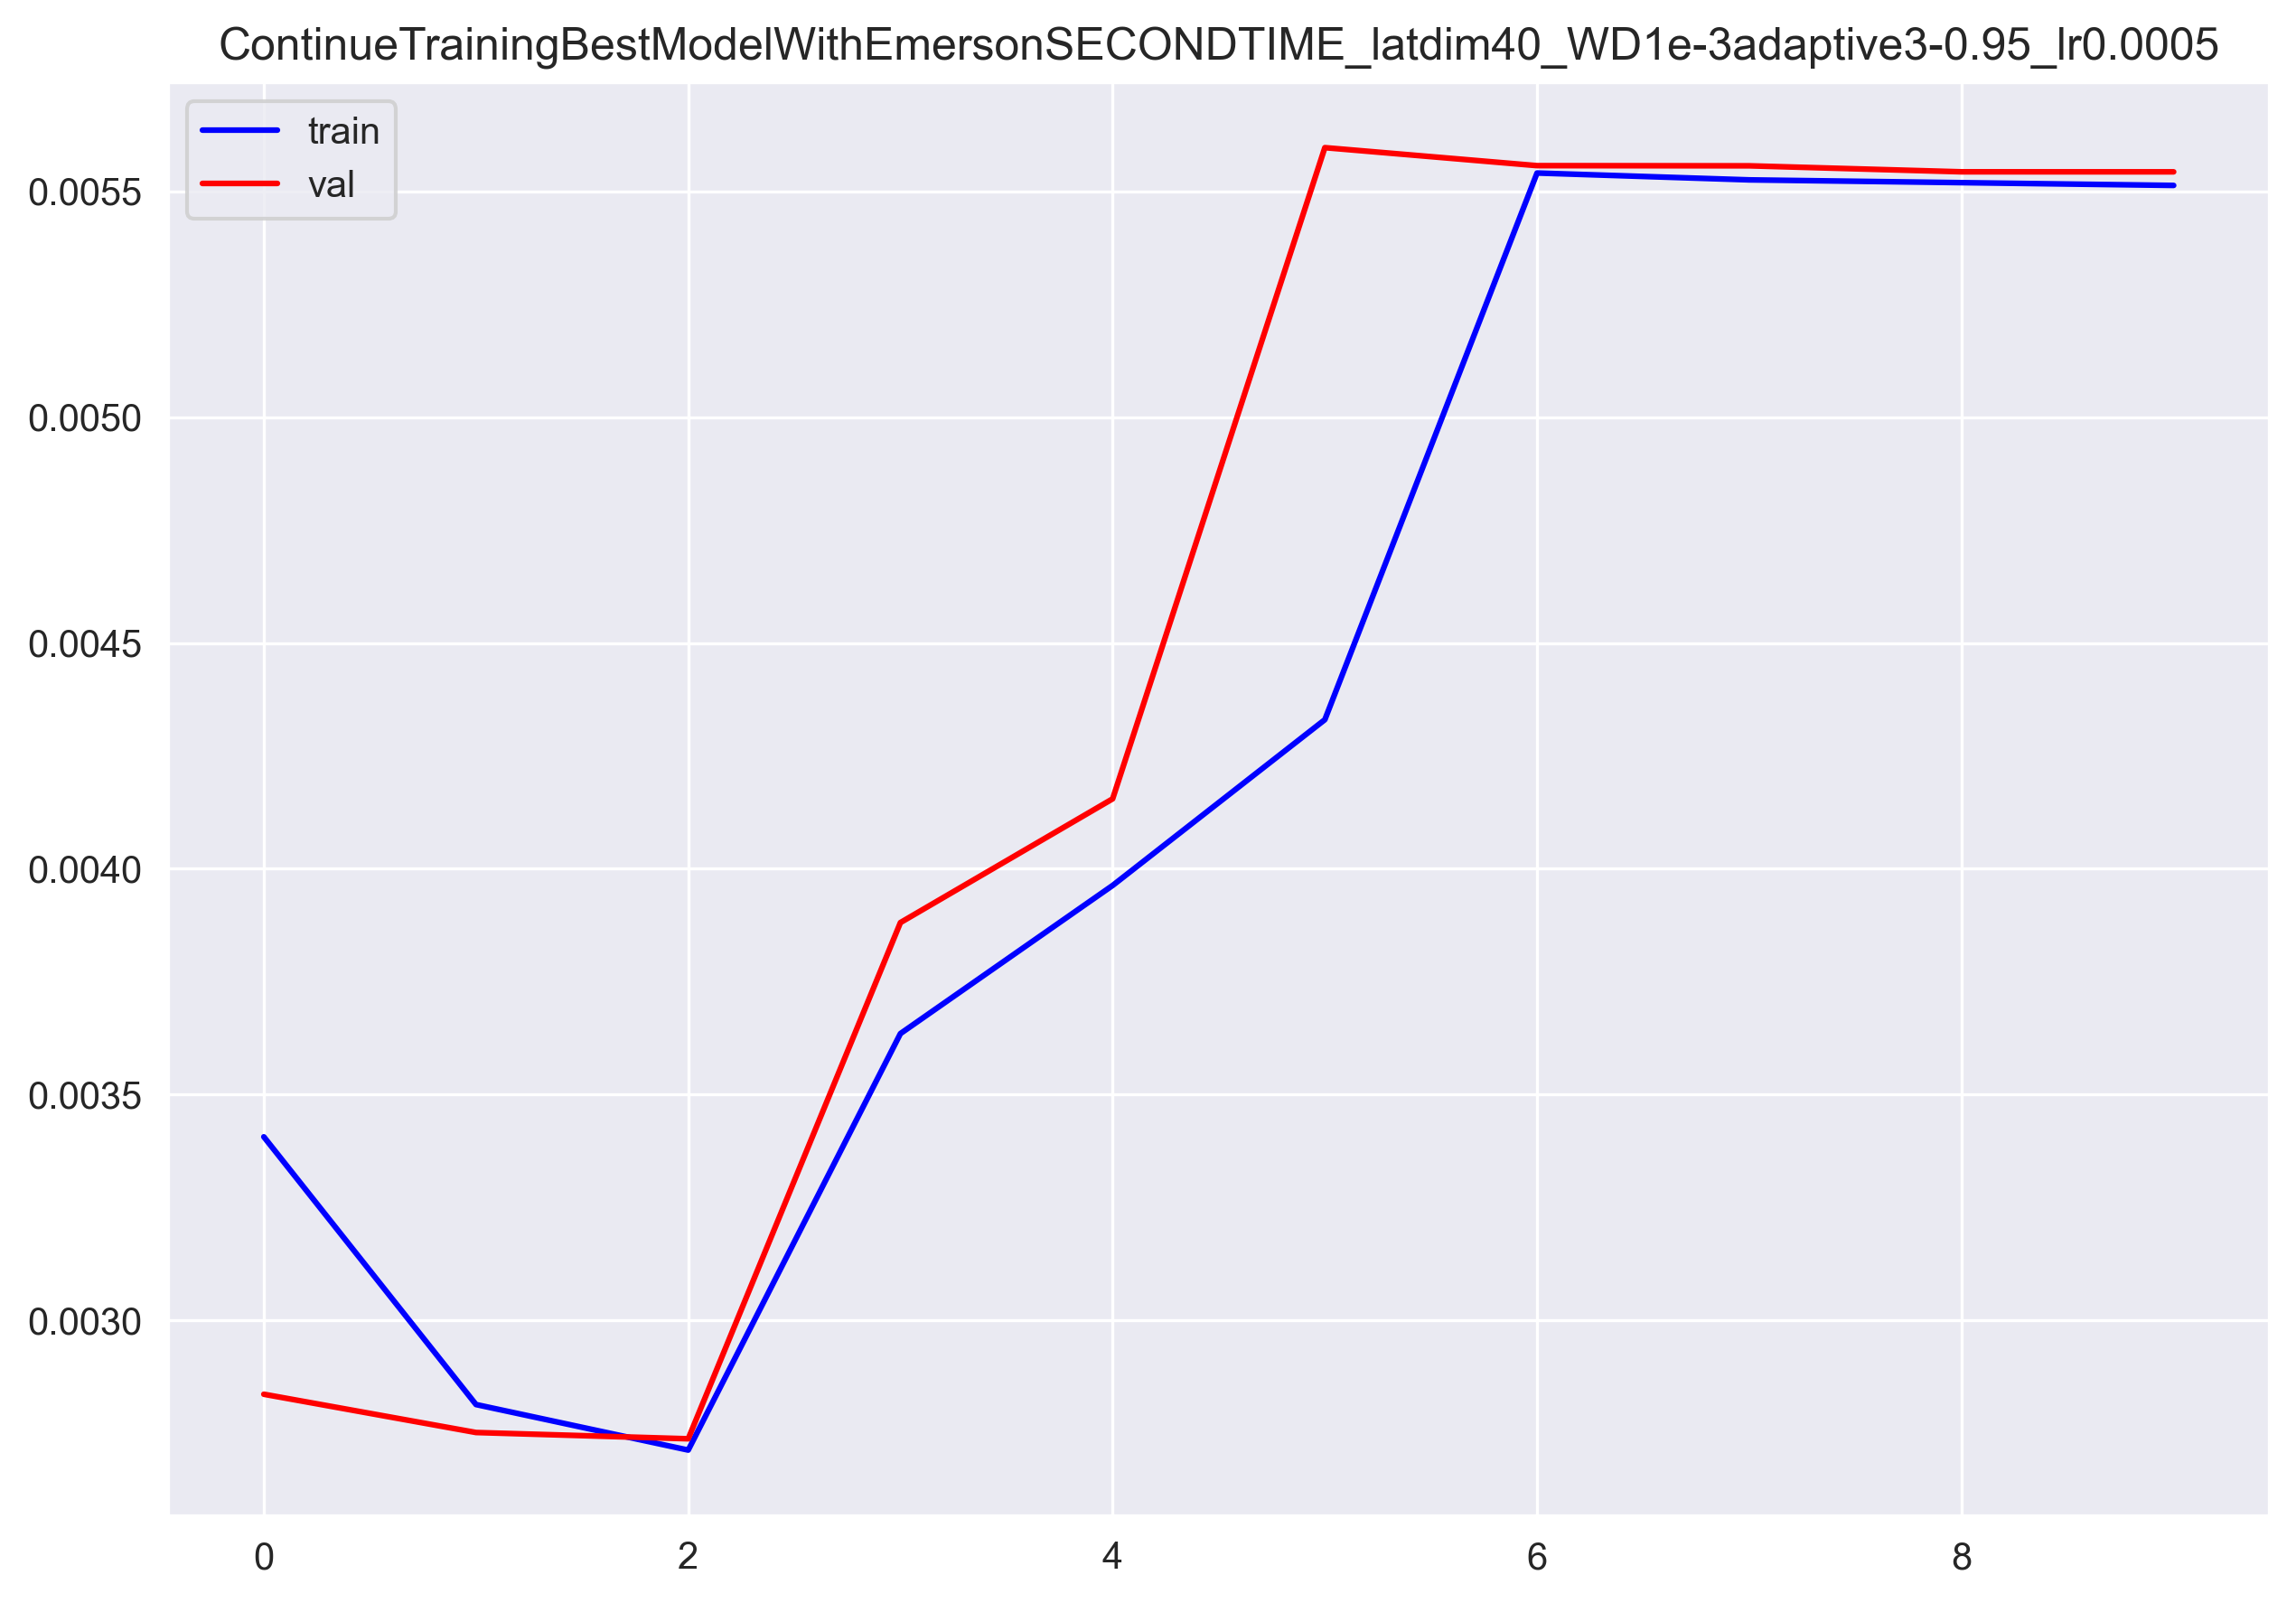

In [6]:
nb_epochs = 10
latent_dim = 40
batchsize = 2**15
lr = 5e-4
adaptive = (3, 0.95)
model_reload =  AutoEncoder(latent_dim = 40, aa_dim = 21, 
                             seq_len = 23, act = nn.SELU())
chkpt = torch.load('./ContinueTrainingBestModelWithEmerson_latdim40_WD1e-3adaptive3-0.95_lr0.0005.pth.tar')
model_reload.load_state_dict(chkpt['state_dict'])
model_reload.to(device)

optimizer = torch.optim.AdamW(model_reload.parameters(), lr = lr, weight_decay=1e-3)
criterion = nn.MSELoss()

name = '_'.join(['ContinueTrainingBestModelWithEmersonSECONDTIME','latdim'+str(latent_dim),'WD1e-3'
                 f'adaptive{adaptive[0]}-{adaptive[1]}','lr'+str(lr)])

train_losses, val_losses = train_eval(model_reload, criterion, optimizer, 
                                      train_dataset, valid_dataset,
                                      batchsize, max_len= 23, weighted=1.6, 
                                      positional = False, device=device, 
                                      lr= lr, nb_epochs = nb_epochs, outdir=os.getcwd(),
                                      filename = name, adaptive=adaptive)

### Then, combine with DeepRC and check prediction ? 

In [8]:
from src.DeepRC_mod import *
class DeepRC_AutoEncoder(nn.Module): 
    
    def __init__(self, #20 for the initial onehot encode dim
                 embedding_net: torch.nn.Module = AutoEncoder(latent_dim = 40, aa_dim = 21, 
                                                              seq_len = 23, act = nn.SELU()).encoder,
                 attention_net: torch.nn.Module = AttentionNetwork(n_input_features = 40, 
                                                                   n_layers=2, n_units = 32),
                 output_net_A: torch.nn.Module = OutputNetwork(n_input_features=40, 
                                                             n_output_features = 21,
                                                              n_layers = 2, n_units = 32),
                 output_net_B: torch.nn.Module = OutputNetwork(n_input_features=40, 
                                                             n_output_features = 40,
                                                              n_layers = 2, n_units = 32),
                 freeze_encoding = True
                ):
        super(DeepRC_AutoEncoder, self).__init__()
        self.embedding = embedding_net.to(dtype=torch.float32)
        #Freezing encoding layer, maybe unfreeze later
        if freeze_encoding:
            for p in self.embedding.parameters():
                p.requires_grad = False
                
        self.attention = attention_net.to(dtype=torch.float32)
        self.out_A = output_net_A.to(dtype=torch.float32)
        self.out_B = output_net_B.to(dtype=torch.float32)
        
    def forward(self, x, n_per_bag):
        seq_embed = self.embedding(x.view(-1, 23*21)) #should be shape (N, latent_dim)
        seq_attention = self.attention(seq_embed)
        # BUT softmax(attn_weight) must be done PER BAG. Given we have the number of sequences,
        #we treat the input (A sequence of bags) sequentially : 
        
        x = []
        start_i = 0
        # n_per_bag stores the number of sequences per bag, so we can use it to slice the attention and embedding
        for n_seqs in n_per_bag : 
            #SLICE AND SOFTMAX OVER THE SLICE
            attention_slice = torch.softmax(seq_attention[start_i:start_i+n_seqs], dim=0)
            embedding_slice = seq_embed[start_i:start_i+n_seqs]
            
            embedding_attention = embedding_slice * attention_slice
            #Weighted sum over the features. The Weight is from the attention
            x.append(embedding_attention.sum(dim=0))
            start_i += n_seqs
            del embedding_attention
            
        x = torch.stack(x, dim = 0)
        pred_a = self.out_A(x)
        pred_b = self.out_B(x)
        return pred_a, pred_b

In [9]:
model_reload = AutoEncoder(latent_dim = latent_dim, aa_dim = 21, 
                             seq_len = 23, act = nn.SELU())
best_chkpt = torch.load('./'+name+'.pth.tar')
model_reload.load_state_dict(best_chkpt['state_dict'])

<All keys matched successfully>

In [11]:
encoder = model_reload.encoder

attn = AttentionNetwork(n_input_features=40,
                           n_layers=2,
                           n_units=64)
out_a = OutputNetwork(n_input_features=40, 
                      n_output_features=21,
                      n_layers=2,
                      n_units=32)
out_b = OutputNetwork(n_input_features=40, 
                      n_output_features=40,
                      n_layers=2,
                      n_units=32)

AutoEncoder_DeepRC = DeepRC_AutoEncoder(encoder, attn, out_a, out_b, freeze_encoding=True)

In [13]:
#Datasets
from src.datasets import * 
from src.DeepRC_mod import *
train_data = EmersonDataset('../training_data_new/emerson_raw/batch1/emerson_batch1_train_top10k_hla.tsv',
                            max_len = 23, scale_by_freq=True)
test_data = EmersonDataset('../training_data_new/emerson_raw/batch1/emerson_batch1_test_top10k_hla.tsv',
                            max_len = 23, scale_by_freq = True)

In [14]:
from datetime import datetime as dt
start_time = dt.now()

train, val = train_data.random_split(val_size=0.3)
del train_data #Once split, we don't need the original Dataset object anymore
end_time = dt.now()       
elapsed = divmod((end_time-start_time).total_seconds(), 60)
print(f"\nTime elapsed:\n\t{elapsed[0]} minutes\n\t{elapsed[1]} seconds to do a split lol")


Time elapsed:
	0.0 minutes
	40.274042 seconds to do a split lol


In [15]:
def drc_train_model(model, criterion, optimizer, dataset, mini_batch_size):
    model.train()
    train_loss_a = 0
    train_loss_b = 0
    #Minibatch SGD, get a list of indices to separate the train data into batches 
    for b in tqdm(BatchSampler(RandomSampler(dataset.unique),
                          batch_size = mini_batch_size, drop_last=False), 
                  desc='Train batches',
                 position = 1, leave=False): 
        #Standard train loops
        seq, target_A, target_B, n_per = train.get_patient(train.unique[b])
        #Sending everything to device
        seq = seq.to(device, dtype=torch.float32)
        target_A = target_A.to(device, dtype=torch.float32)
        target_B = target_B.to(device, dtype=torch.float32)
        #Prediction & loss for each label
        pred_a, pred_b = model(seq, n_per)
        loss_A = criterion(pred_a, target_A)
        loss_B = criterion(pred_b, target_B)
        #Optimizer
        model.zero_grad()
        loss = loss_A+loss_B
        loss.backward()
        optimizer.step()
        train_loss_a += loss_A.item()
        train_loss_b += loss_B.item()
        
    train_loss_a /= math.floor(len(dataset.unique)/mini_batch_size)
    train_loss_b /= math.floor(len(dataset.unique)/mini_batch_size)

    return train_loss_a, train_loss_b


def drc_eval_model(model, criterion, dataset, mini_batch_size):
    model.eval()
    val_loss_a = 0
    val_loss_b = 0
    with torch.no_grad():
        for b in tqdm(BatchSampler(RandomSampler(dataset.unique), batch_size = mini_batch_size,
                         drop_last = False), desc = 'Val batches',
                      position = 2, leave=False):
            seq, target_A, target_B, n_per = dataset.get_patient(dataset.unique[b])
            #Sending everything to device
            seq = seq.to(device, dtype=torch.float32)
            target_A = target_A.to(device, dtype=torch.float32)
            target_B = target_B.to(device, dtype=torch.float32)
            pred_a, pred_b = model(seq, n_per)
            val_loss_a += criterion(pred_a, target_A).item()
            val_loss_b += criterion(pred_b, target_B).item()
    val_loss_a /= math.floor(len(dataset.unique)/mini_batch_size)
    val_loss_b /= math.floor(len(dataset.unique)/mini_batch_size)
    return val_loss_a, val_loss_b

  0%|          | 0/30 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

Train batches:   0%|          | 0/25 [00:00<?, ?it/s]

Val batches:   0%|          | 0/11 [00:00<?, ?it/s]

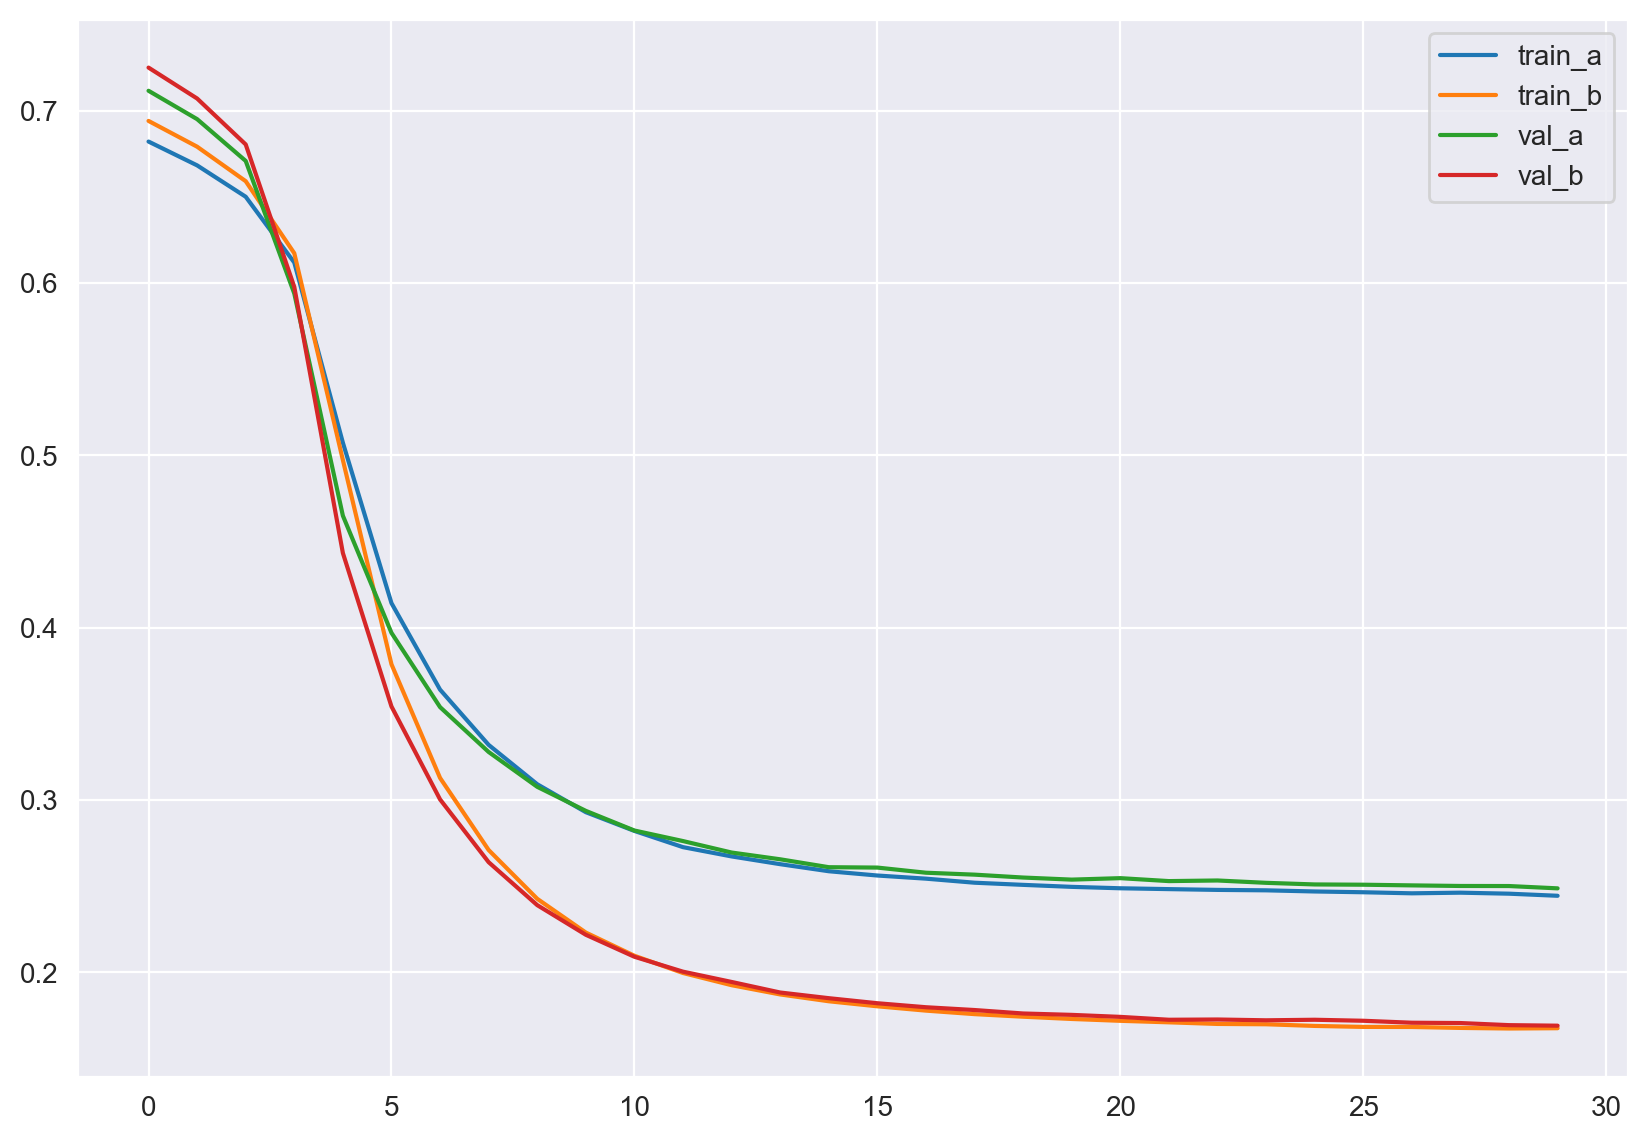

In [24]:
from tqdm.auto import tqdm
#Training stuff
nb_epochs = 30
mini_batch_size = 16 # 16 bags at a time
lr = 1e-4 # the creator used 1e-4
criterion = nn.BCELoss() #Used for multilabel classification + Sigmoid
adam = optim.Adam(params=AutoEncoder_DeepRC.parameters(), lr = lr)
train_losses_a = []
train_losses_b = []
AutoEncoder_DeepRC.to(device)
val_losses_a = []
val_losses_b = [] 

best_a = 100000
best_b = 100000

for e in tqdm(range(nb_epochs),position=0):
    train_loss_a, train_loss_b = drc_train_model(AutoEncoder_DeepRC, criterion, optimizer=adam, dataset=train,
                                      mini_batch_size=mini_batch_size)
    print(f'train loss at {e} epochs: A:\t{train_loss_a:.4e}, B:\t{train_loss_b:.4e}', end='\r')
    train_losses_a.append(train_loss_a)
    train_losses_b.append(train_loss_b)
    #validation
    val_a, val_b = drc_eval_model(AutoEncoder_DeepRC, criterion, dataset=val, 
                              mini_batch_size=mini_batch_size)
    
    if val_a < best_a : best_a = val_a
    if val_b < best_b : best_b = val_b
        
    if e != 0 and np.mean([val_a, val_b]) <= np.mean([best_a, best_b]):
        torch.save({'state_dict':AutoEncoder_DeepRC.state_dict(), 'epoch':e}, './DeepRC_Autoencoder.pth.tar')
        
    val_losses_a.append(val_a)
    val_losses_b.append(val_b)
    print(f'val loss at {e} epochs: A:\t{val_a:.4e}, B:\t{val_b:.4e}', end='\r')
    
losses = {'train_a':train_losses_a,
          'train_b':train_losses_b,
          'val_a' : val_losses_a,
          'val_b' : val_losses_b}
plt.figure(figsize=(10,7))
for k in losses.keys():
    plt.plot(losses[k], label = k)
plt.legend()
save_pkl('./withBestAutoEncoder_frozen_losses.pkl', losses)

In [262]:
AutoEncoder_DeepRC

DeepRC_AutoEncoder(
  (embedding): Sequential(
    (0): Linear(in_features=483, out_features=241, bias=True)
    (1): SELU()
    (2): Linear(in_features=241, out_features=100, bias=True)
    (3): SELU()
    (4): Linear(in_features=100, out_features=40, bias=True)
  )
  (attention): AttentionNetwork(
    (attention_nn): Sequential(
      (0): Linear(in_features=40, out_features=64, bias=True)
      (1): SELU()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): SELU()
      (4): Linear(in_features=64, out_features=1, bias=True)
    )
  )
  (out_A): OutputNetwork(
    (output_nn): Sequential(
      (0): Linear(in_features=40, out_features=32, bias=True)
      (1): SELU()
      (2): Linear(in_features=32, out_features=21, bias=True)
    )
    (sig): Sigmoid()
    (dropout): Identity()
  )
  (out_B): OutputNetwork(
    (output_nn): Sequential(
      (0): Linear(in_features=40, out_features=32, bias=True)
      (1): SELU()
      (2): Linear(in_features=32, out_features=

### Multi-label classification metrics

In [303]:
chkpt = torch.load('./DeepRC_Autoencoder.pth.tar')
AutoEncoder_DeepRC.load_state_dict(chkpt['state_dict'])

<All keys matched successfully>

In [316]:
DATA = test_data.get_random_patients(1)
AutoEncoder_DeepRC = AutoEncoder_DeepRC.cpu()
out_A, out_B = AutoEncoder_DeepRC(DATA[0], DATA[3])
#out_A[out_A>=0.51] = 1 else 0
out_A>=0.2, out_B>=0.2, DATA[1], DATA[2]

(tensor([[ True,  True,  True, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False, False,
          False]]),
 tensor([[False,  True, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False, False]]),
 tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0.]]),
 tensor([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0.]]))

In [312]:
DATA[1].sum()

tensor(2.)

In [313]:
torch.where(out_A>=0.2)

(tensor([0, 0, 0, 0]), tensor([0, 1, 2, 5]))